In [258]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as plot
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline

# 폰트지정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 18

# 폰트를 지정하면 그래프에서 마이너스 폰트가 깨져서 다음과 같이 셋팅
mpl.rcParams['axes.unicode_minus'] = False

## 날짜 포멧팅

In [15]:
now = "2022년04월13일"

In [16]:
type(now)

str

In [17]:
# 날짜와 시간은 해당 타입에 맞는 날짜와 시간을 사용해야한다

from datetime import datetime, date, time

In [18]:
dt = datetime(2022, 4, 13)

In [19]:
'{0}-{1}-{2}'.format(dt.year, dt.month, dt.day)

'2022-4-13'

In [22]:
dt.date()

datetime.date(2022, 4, 13)

In [23]:
# strftime 함수는 한국어 처리가 안된다
# 한글을 쓰기 위해서는 문자열 포멧을 사용해야한다.
'{0.year}년{0.month}월{0.day}일'.format(dt)

'2022년4월13일'

In [24]:
# 문자열을 읽어서 변환하는 경우 한글을 사용할 수 있다
datetime.strptime("2022년 4월 13일", '%Y년 %m월 %d일')

datetime.datetime(2022, 4, 13, 0, 0)

In [25]:
from dateutil.parser import parse

In [27]:
# 문자열을 알아서 파싱 (parse 함수는 한국어 처리가 안됨)
parse('May 7, 1996 11:30am')

datetime.datetime(1996, 5, 7, 11, 30)

## 타입 변환

In [31]:
# 날짜를 요소로 가지는 시리즈
날짜시리즈 = Series(['2022-04-01', '2022-04-30'])

In [32]:
날짜시리즈

0    2022-04-01
1    2022-04-30
dtype: object

In [33]:
## 날짜 값을 가지는 문자열을 날짜 타입으로 변환
pd.to_datetime(날짜시리즈)

0   2022-04-01
1   2022-04-30
dtype: datetime64[ns]

## 요일

In [34]:
now = datetime.now()

In [35]:
print(now)

2022-04-26 20:09:45.279685


In [36]:
now.weekday()

1

In [37]:
# 요일을 리스트로 변환
요일 = list('월화수목금토일')
요일

['월', '화', '수', '목', '금', '토', '일']

In [38]:
요일[now.weekday()]

'화'

# 날짜 타입을 이용한 데이터 그룹화

In [441]:
df = pd.read_csv('D:/pythonTest/DataShipJo/chicken_date.csv', names=['num','date','review'])
df.head()

,num,date,review
0,0.0,2022년 04월 13일,튀김옷 바삭바삭 맛있어요
1,1.0,2022년 04월 13일,배달 빠르구 맛있어용~!
2,2.0,2022년 04월 13일,맛있게 잘 먹었습니다
3,3.0,2022년 04월 13일,맛있게 잘 먹었습니다
4,4.0,2022년 04월 13일,날씬한 다리가 아숩지만 맛있어요


In [442]:
# 결측값 확인
df.isna().sum()

num       154
date      118
review    112
dtype: int64

In [443]:
# 결측값 열 제거
df.dropna(inplace=True)

In [444]:
df.isna().sum()

num       0
date      0
review    0
dtype: int64

In [445]:
# 'num' 컬럼 소수점 제거 (중요하지 않음)
df['num'] = df['num'].round(0).astype(int)
df.head()

,num,date,review
0,0,2022년 04월 13일,튀김옷 바삭바삭 맛있어요
1,1,2022년 04월 13일,배달 빠르구 맛있어용~!
2,2,2022년 04월 13일,맛있게 잘 먹었습니다
3,3,2022년 04월 13일,맛있게 잘 먹었습니다
4,4,2022년 04월 13일,날씬한 다리가 아숩지만 맛있어요


In [446]:
# dateType으로 변환을 위함1 :: '일', 공백 제거
df["date"] = df["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)

In [447]:
# dateType으로 변환을 위함2 :: '년,월' 제거 후 '-' 삽입
df["date"] = df["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [448]:
# dateType으로 변환
df['date'] = pd.to_datetime(df['date'])

In [449]:
# date 컬럼의 첫번째 행의 년도
df['date'][0].year

2022

In [450]:
# '날짜' 컬럼의 시리즈에서 map 함수의 매게변수로 날짜를 받아서 연도를 반환
연도 = df['date'].map(lambda d: d.year)

In [451]:
연도.sample(10)

7743     2019
8239     2018
14743    2021
11422    2020
7571     2019
9674     2017
4412     2020
17339    2019
6726     2020
6923     2019
Name: date, dtype: int64

In [452]:
# 연도별 리뷰수의 평균을 구한다
review_year_mean = df.pivot_table('num',aggfunc='mean',columns=연도)
review_year_mean

date,2015,2016,2017,2018,2019,2020,2021,2022
num,10182.5,10050.0,10346.538095,11994.091607,11896.596604,8668.305549,8682.954502,9364.823608


In [453]:
# 시각화를 위해 x,y 변수에 features 와 연도별 리뷰수 평균값 저장
x = review_year_mean.columns
y = review_year_mean.values

In [454]:
# 각 년,월별 리뷰수
년월 = df['date'].map(lambda d: '{0.year}-{0.month:02d}'.format(d))

In [455]:
년월.sample(10)

5246     2020-08
8854     2018-06
9027     2018-05
1839     2021-10
16388    2020-01
9968     2016-11
2293     2021-08
12838    2019-11
7812     2019-04
2316     2021-08
Name: date, dtype: object

* 시각화를 하기 위해서 x,y 값이 리스트가 되어야 함
* x,y 값이 같은 차원이여야 함
### 현재
* x 값 : 리스트, 1차원
* y 값 : 어레이, 2차원

In [456]:
# y 값을 리스트로 
y = y.tolist()

# 2차원을 1차원으로
y = sum(y,[])

C:\Users\USER\AppData\Local\Temp/ipykernel_15548/3635052181.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax1.plot(x,y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6)


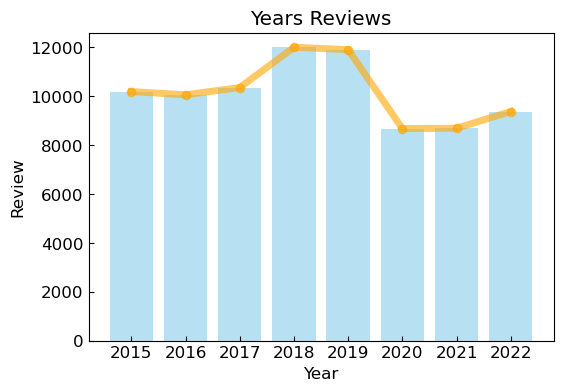

In [489]:
# 연도별 평균 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots()

ax1.plot(x,y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6)
#ax1.set_ylim(2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Review')
ax1.tick_params(axis='both', direction='in')


#ax2 = ax1.twinx()
ax1.bar(x,y, color='skyblue', alpha=0.6)
ax1.tick_params(axis='both', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax1.set_zorder(ax2.get_zorder()+10)
ax1.patch.set_visible(False)

plt.title('Years Reviews')
plt.show()

### 최근 5개월 리뷰수 시각화

In [519]:
df2 = pd.read_csv('D:/pythonTest/DataShipJo/chicken_date.csv', names=['num','date','review'])
df2.dropna(inplace=True)
df2['num'] = df2['num'].round(0).astype(int)
df2["date"] = df2["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)
df2["date"] = df2["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [460]:
# 최근 5개월 lately_x 값에 저장
lately_x = ['2021-12','2022-01','2022-02','2022-03','2022-04']
lately_x

['2021-12', '2022-01', '2022-02', '2022-03', '2022-04']

In [530]:
# 최근 5개월 리뷰수 lately_y 값에 저장하기

lately_12 = len(df2[df2['date'].str.contains('2021-12')])
lately_1 = len(df2[df2['date'].str.contains('2022-01')])
lately_2 = len(df2[df2['date'].str.contains('2022-02')])
lately_3 = len(df2[df2['date'].str.contains('2022-03')])
lately_4 = len(df2[df2['date'].str.contains('2022-04')])

lately_y = [lately_4, lately_3, lately_2, lately_1, lately_12]
lately_y

[453, 923, 892, 731, 841]

C:\Users\USER\AppData\Local\Temp/ipykernel_15548/1031652449.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


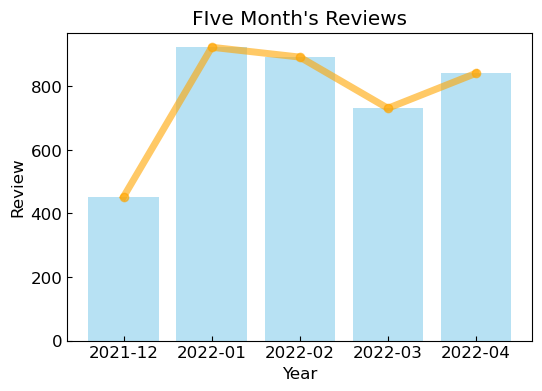

In [532]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax1_ = plt.subplots()

ax1_.plot(lately_x,lately_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax1_.set_xlabel('Year')
ax1_.set_ylabel('Review')
ax1_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax1_.bar(lately_x,lately_y, color='skyblue', alpha=0.6, label='Review')
ax1_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax1_.set_zorder(ax1_.get_zorder()+10)
ax1_.patch.set_visible(False)

plt.title("FIve Month's Reviews")
plt.show()

## 연도별 리뷰수 시각화

In [533]:
df3 = pd.read_csv('D:/pythonTest/DataShipJo/chicken_date.csv', names=['num','date','review'])
df3.dropna(inplace=True)
df3['num'] = df3['num'].round(0).astype(int)
df3["date"] = df3["date"].str.replace(pat=r'[일 ]', repl=r'', regex=True)
df3["date"] = df3["date"].str.replace(pat=r'[년월]', repl=r'-', regex=True)

In [535]:
# 2015~2022년도 year_x 값에 저장
year_x = ['2015','2016','2017','2018','2019','2020','2021','2022']
year_x

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [538]:
# 2015~2022년도 리뷰수 year_y 값에 저장
year_15 = len(df2[df2['date'].str.contains('2015')])
year_16 = len(df2[df2['date'].str.contains('2016')])
year_17 = len(df2[df2['date'].str.contains('2017')])
year_18 = len(df2[df2['date'].str.contains('2018')])
year_19 = len(df2[df2['date'].str.contains('2019')])
year_20 = len(df2[df2['date'].str.contains('2020')])
year_21 = len(df2[df2['date'].str.contains('2021')])
year_22 = len(df2[df2['date'].str.contains('2022')])

year_y = [year_15, year_16, year_17, year_18, year_19, year_20, year_21, year_22]
year_y

[72, 193, 630, 1954, 2945, 4307, 6264, 2999]

C:\Users\USER\AppData\Local\Temp/ipykernel_15548/770060465.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-co" (-> color='c'). The keyword argument will take precedence.
  ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')


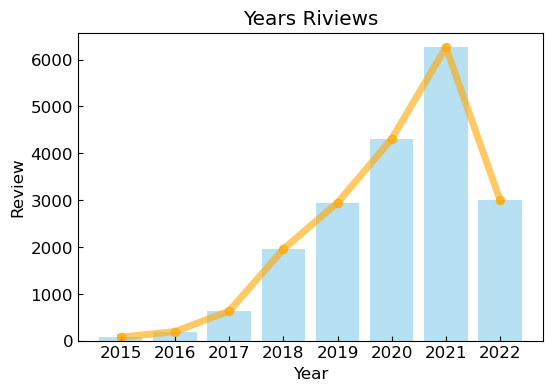

In [542]:
# 최근 5개월 리뷰수 시각화

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

fig, ax2_ = plt.subplots()

ax2_.plot(year_x,year_y, '-co', color='orange', markersize=6, linewidth=5, alpha=0.6, label='Review')
#ax1.set_ylim(0,18)
ax2_.set_xlabel('Year')
ax2_.set_ylabel('Review')
ax2_.tick_params(axis='both', direction='in')


#ax2_ = ax1_.twinx()
ax2_.bar(year_x,year_y, color='skyblue', alpha=0.6, label='Review')
ax2_.tick_params(axis='y', direction='in')

# 그래프 순서 정하기 :: 막대 그래프 뒤로 배치
ax2_.set_zorder(ax2_.get_zorder()+10)
ax2_.patch.set_visible(False)

plt.title("Years Riviews")
plt.show()